In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
# Reading Dataset
data=pd.read_csv("/content/gdrive/MyDrive/Assignment/fake job detectio/fake_job_postings.csv")

In [ ]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# To check the number of rows and column
data.shape

(19863, 18)

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 400
department             13010
salary_range           16489
company_profile         5134
description                1
requirements            3235
benefits                8105
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         4110
required_experience     8105
required_education      9288
industry                5712
function                7390
fraudulent                 0
dtype: int64

In [ ]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [ ]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)

df3 = pd.DataFrame(y_res)

# the default behaviour is join='outer'
# inner join

result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(19863, 12)
(19863,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Data Architect for contract to Hire Position,"US, TN, memphis",,,Job Title : Data ArchitectLocation ...,,,Contract,Mid-Senior level,,Information Technology and Services,,0
1,Teradata DBA,"US, PA, Philadelphia",IT,ValleySoft is a fast growing global IT Service...,•Onshore Lead Teradata DBA - The Lead DBA will...,"Skill Teradata DBA,SQLLocation Philadelphia, P...",,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
2,CNC Machinist,"US, PA, Philadelphia",,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,,,Full-time,,,,,0
3,Senior .NET Developer,"GR, I, Athens",Software Development,Working at i-kiosk means following your passio...,The Senior Developer is expected to play a maj...,Programming SkillsCandidates will be expected ...,You will be team member of an awarded tech sta...,,,,,,0
4,Social Media Intern,"US, NY, New York",,Sawyer Studios is a full service marketing and...,30 hours per week for a 3 month period.The Soc...,Job ResponsibilitiesFirst-pass writing of dail...,This is a great opportunity and could lead to ...,Contract,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
6084,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
6085,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
6086,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

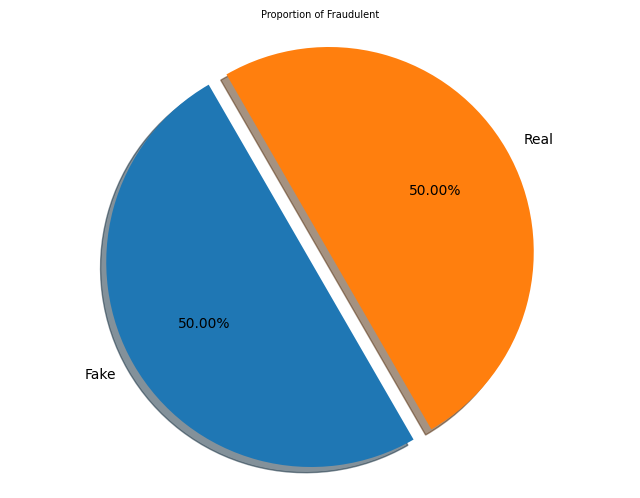

In [ ]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [ ]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       US
1       US
2       US
3       GR
4       US
        ..
6083    US
6084    AU
6085    PL
6086    US
6087    US
Name: country, Length: 6088, dtype: object

In [ ]:
# this will give unique country values
data['country'].nunique()

66

In [ ]:
# top 10 country that post jobs
data['country'].value_counts()[:11]

US    4272
GB     502
AU     241
GR     163
       126
CA     123
IN      70
DE      68
NZ      51
PH      32
PL      28
Name: country, dtype: int64

Text(0.5, 0, 'Countries')

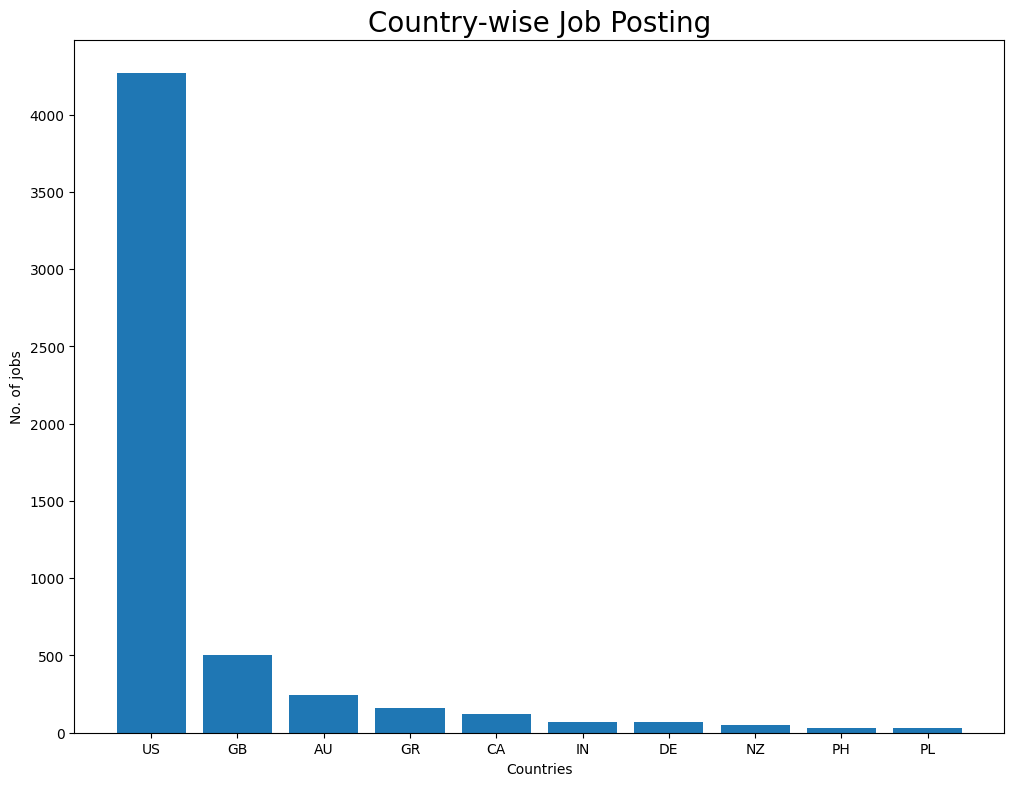

In [ ]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [ ]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'IN', 'DE', 'NZ', 'PH', 'PL'])

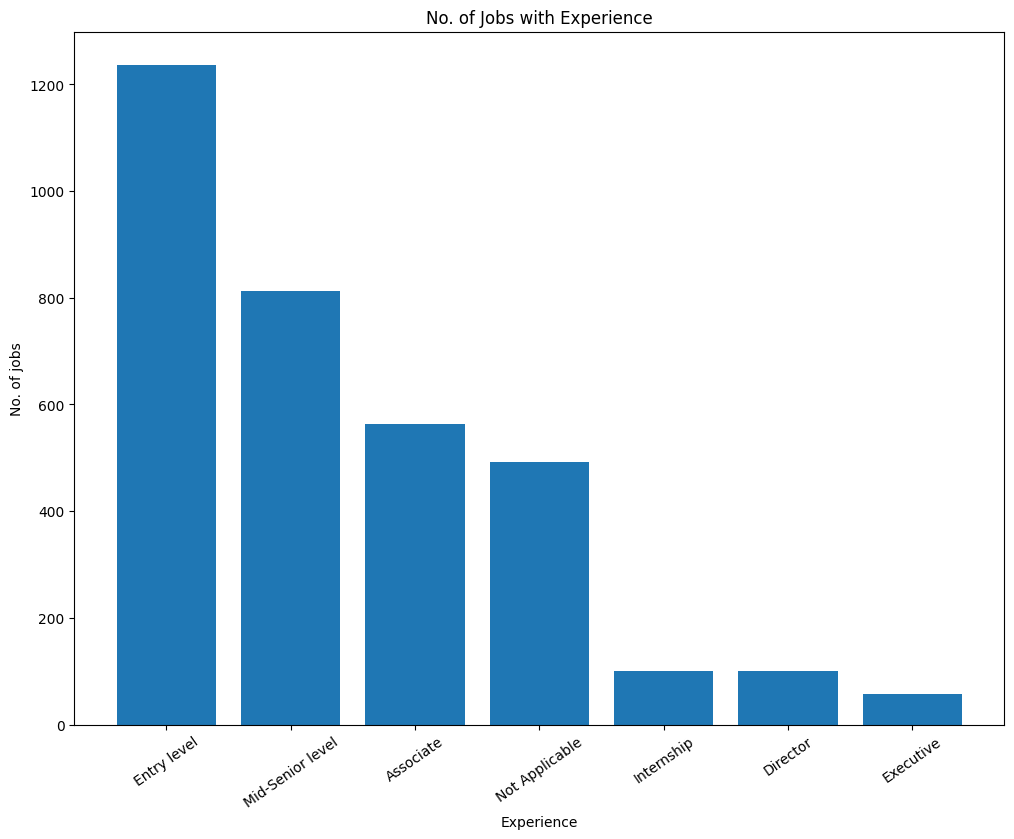

In [ ]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    144
Administrative Assistant                                                 91
Cruise Staff Wanted *URGENT*                                             91
Home Based Payroll Typist/Data Entry Clerks Positions Available          88
Customer Service Representative                                          61
Data Entry                                                               55
English Teacher Abroad                                                   46
Network Marketing                                                        44
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily      43
Account Sales Managers $80-$130,000/yr                                   43
Name: title, dtype: int64


In [ ]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    144
Cruise Staff Wanted *URGENT*                                             91
Home Based Payroll Typist/Data Entry Clerks Positions Available          88
Administrative Assistant                                                 86
Data Entry                                                               54
Customer Service Representative                                          54
Network Marketing                                                        44
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily      43
Account Sales Managers $80-$130,000/yr                                   43
Agency Sales Managers $150-$175,000/yr                                   39
Name: title, dtype: int64


In [ ]:
# For textual type data we will try to create word cloud
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [ ]:
data.head()

,fraudulent,text
0,0,Data Architect for contract to Hire Position ...
1,0,"Teradata DBA US, PA, Philadelphia ValleySoft i..."
2,0,"CNC Machinist US, PA, Philadelphia We Provide ..."
3,0,"Senior .NET Developer GR, I, Athens Working at..."
4,0,"Social Media Intern US, NY, New York Sawyer St..."


**Understanding the common words used in the texts : Wordcloud**

In [ ]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

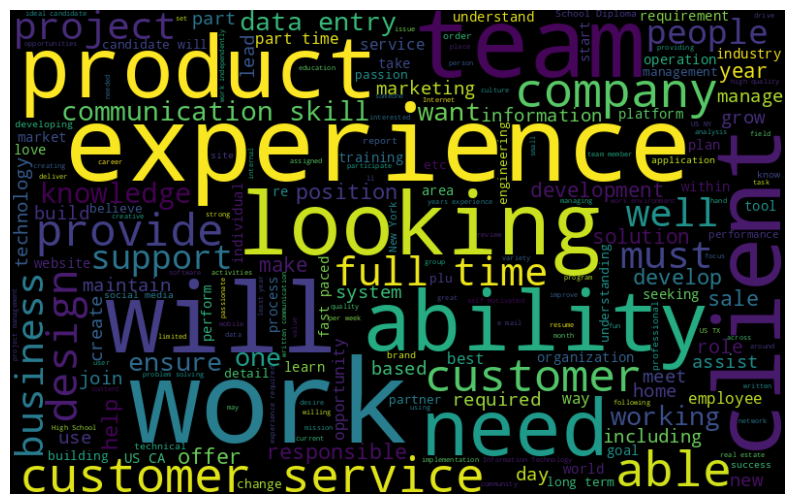

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


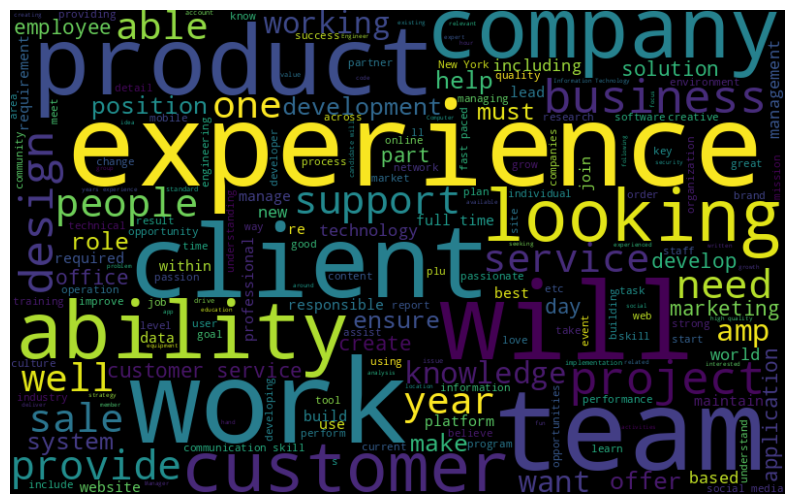

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

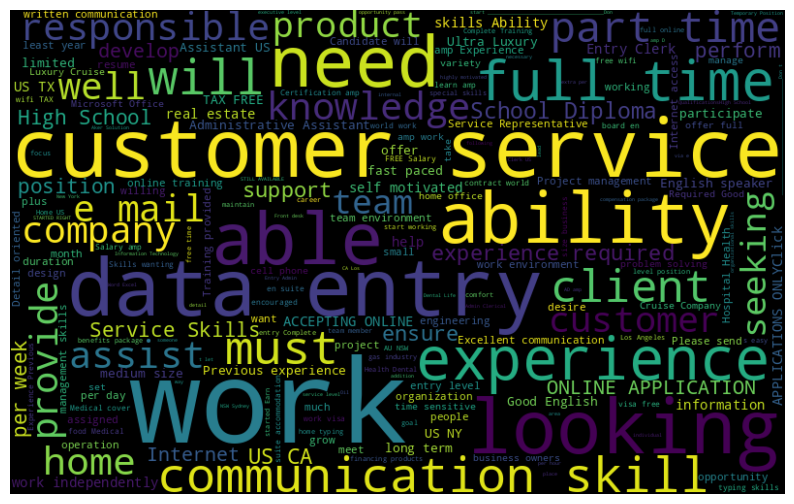

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [ ]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [ ]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [ ]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


476     0
5856    1
3390    1
50      0
2873    0
       ..
2487    0
702     0
1435    0
448     0
2013    0
Name: fraudulent, Length: 4261, dtype: int64
476     senior digital account manager my, 10, kuala l...
5856    admin assistant position au, , company seeking...
3390    clerical assistant us, ny, albany clerical ass...
50      first line manager gb, , client north nottingh...
2873    office manager pl, , netguru love develop web ...
                              ...                        
2487    training officer ph, , makati city training of...
702     senior developer gb, lnd, london social media ...
1435    senior coldfusion developer be, bru, brussels ...
448     collector iii-mortgage servicing us, tx, frisc...
2013    publisher account manager denmark dk, , rolepu...
Name: text, Length: 4261, dtype: object


In [ ]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [ ]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 49)	1
  (0, 265)	1
  (0, 893)	2
  (0, 906)	1
  (0, 917)	1
  (0, 1042)	2
  (0, 1154)	1
  (0, 1204)	1
  (0, 1288)	1
  (0, 1292)	1
  (0, 1318)	1
  (0, 1329)	1
  (0, 1489)	1
  (0, 1500)	2
  (0, 1501)	1
  (0, 1609)	1
  (0, 1634)	4
  (0, 1801)	3
  (0, 1854)	1
  (0, 1920)	1
  (0, 1961)	3
  (0, 1984)	1
  (0, 2036)	1
  (0, 2223)	1
  (0, 2301)	1
  :	:
  (4260, 26525)	1
  (4260, 26696)	1
  (4260, 26805)	2
  (4260, 27552)	1
  (4260, 27650)	2
  (4260, 27686)	1
  (4260, 28114)	1
  (4260, 28596)	3
  (4260, 28653)	1
  (4260, 29514)	1
  (4260, 29567)	1
  (4260, 29754)	1
  (4260, 29923)	1
  (4260, 30285)	1
  (4260, 30595)	1
  (4260, 30666)	1
  (4260, 31389)	1
  (4260, 31488)	2
  (4260, 31648)	1
  (4260, 31909)	1
  (4260, 32439)	1
  (4260, 32483)	1
  (4260, 34061)	1
  (4260, 34360)	2
  (4260, 34420)	1


In [ ]:
# PCA is not advisable for a NLP task,because PCA is for
# principal feature extraction and in this case we already have features

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1827x35989 sparse matrix of type '<class 'numpy.int64'>'
	with 263421 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<h2>Naive Bayes</h2>

In [ ]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 13.2 ms, sys: 0 ns, total: 13.2 ms
Wall time: 13.1 ms


MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 0 0 ... 1 0 0]


In [ ]:
nb.score(X_test_dtm,y_test)

0.9622331691297209

In [ ]:
import seaborn as sn

Classification Accuracy: 0.9622331691297209
Training Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2152
           1       0.97      0.97      0.97      2109

    accuracy                           0.97      4261
   macro avg       0.97      0.97      0.97      4261
weighted avg       0.97      0.97      0.97      4261

Testing Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       892
           1       0.96      0.96      0.96       935

    accuracy                           0.96      1827
   macro avg       0.96      0.96      0.96      1827
weighted avg       0.96      0.96      0.96      1827

Confusion Matrix

[[858  34]
 [ 35 900]]


Text(95.72222222222221, 0.5, 'Truth')

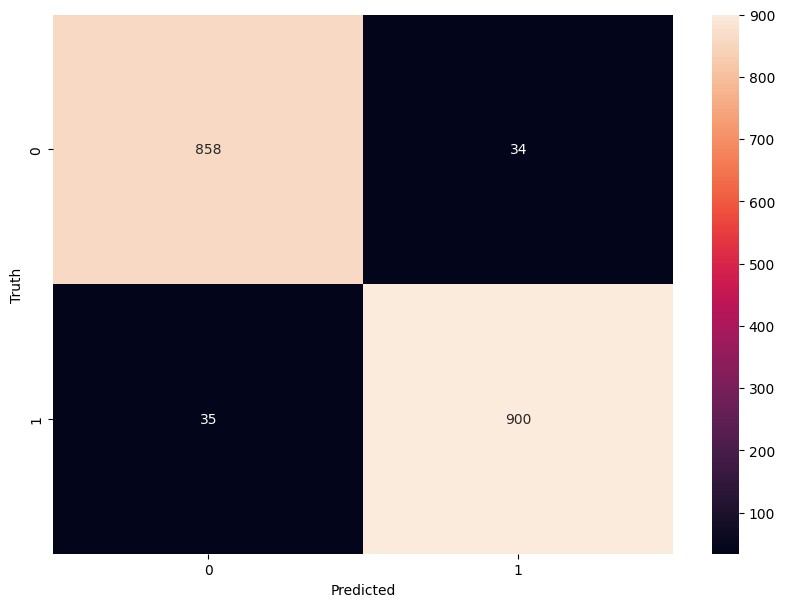

In [ ]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print('Training Classification report for Naive Bayes:\n',classification_report(y_train, nb.predict(X_train_dtm)))
print('Testing Classification Report for Naive Bayes:\n',classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
lr = LogisticRegression()
%time lr.fit(X_train_dtm, y_train)

CPU times: user 1.55 s, sys: 1.9 s, total: 3.45 s
Wall time: 2.93 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_test_dtm,y_test)

0.9611384783798577

In [ ]:

y_pred_lr = lr.predict(X_test_dtm)
print(y_pred_lr)

[0 0 0 ... 1 0 0]


In [ ]:
import seaborn as sn

Classification Accuracy: 0.9611384783798577
Training Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       1.00      1.00      1.00      2109

    accuracy                           1.00      4261
   macro avg       1.00      1.00      1.00      4261
weighted avg       1.00      1.00      1.00      4261

Testing Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       892
           1       0.94      0.98      0.96       935

    accuracy                           0.96      1827
   macro avg       0.96      0.96      0.96      1827
weighted avg       0.96      0.96      0.96      1827

Confusion Matrix

[[838  54]
 [ 17 918]]


Text(95.72222222222221, 0.5, 'Truth')

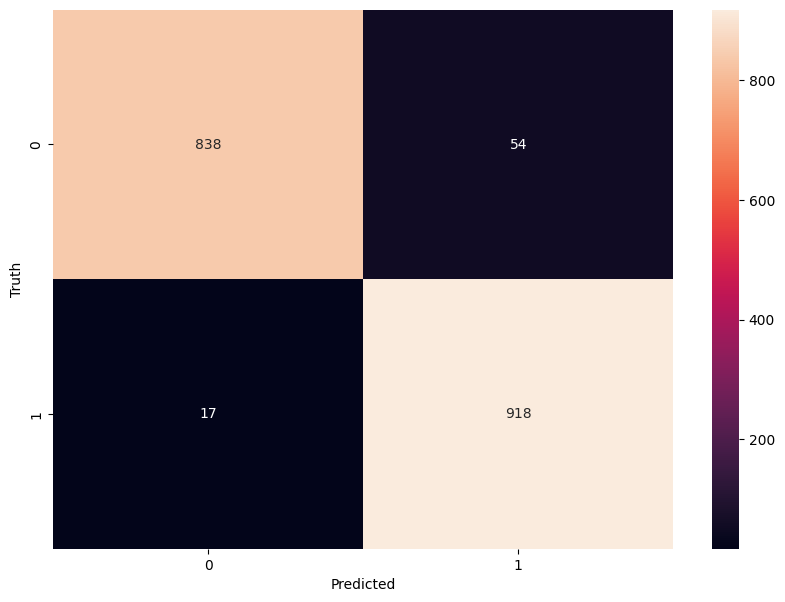

In [ ]:
accuracy_score(y_test, y_pred_lr)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_lr))
print('Training Classification report for Logistic Regression:\n',classification_report(y_train, lr.predict(X_train_dtm)))
print('Testing Classification Report for Logistic Regression:\n',classification_report(y_test, y_pred_lr))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_lr))


cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 50)


In [ ]:
knn.fit(X_train_dtm, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred_knn = knn.predict(X_test_dtm)
print(y_pred_knn)

[1 0 1 ... 1 1 1]


In [ ]:
knn.score(X_test_dtm,y_test)

0.6190476190476191

Classification Accuracy: 0.6190476190476191
Training Classification report for KNN:
               precision    recall  f1-score   support

           0       0.95      0.24      0.38      2152
           1       0.56      0.99      0.71      2109

    accuracy                           0.61      4261
   macro avg       0.75      0.61      0.55      4261
weighted avg       0.75      0.61      0.55      4261

Testing Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.95      0.23      0.37       892
           1       0.57      0.99      0.73       935

    accuracy                           0.62      1827
   macro avg       0.76      0.61      0.55      1827
weighted avg       0.76      0.62      0.55      1827

Confusion Matrix

[[208 684]
 [ 12 923]]


Text(95.72222222222221, 0.5, 'Truth')

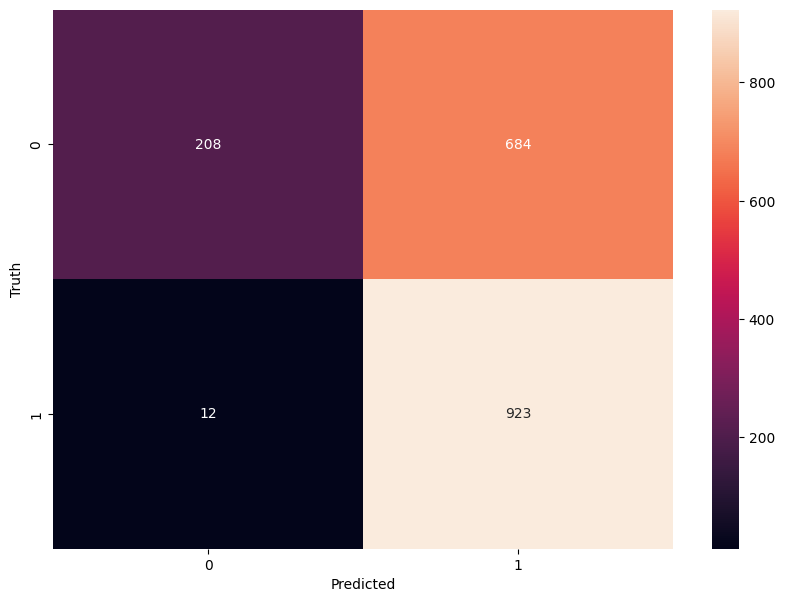

In [ ]:
import seaborn as sn
accuracy_score(y_test, y_pred_knn)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_knn))
print('Training Classification report for KNN:\n',classification_report(y_train, knn.predict(X_train_dtm)))
print('Testing Classification Report for KNN:\n',classification_report(y_test, y_pred_knn))

print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_knn))

cm = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_trees = 100  # set the number of trees to 50
rf = RandomForestClassifier(n_estimators=n_trees)
rf.fit(X_train_dtm, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test_dtm)
print(y_pred_rf)

[0 0 0 ... 1 0 0]


In [ ]:
rf.score(X_test_dtm,y_test)

0.9666119321291735

Classification Accuracy: 0.9666119321291735
Training Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       1.00      1.00      1.00      2109

    accuracy                           1.00      4261
   macro avg       1.00      1.00      1.00      4261
weighted avg       1.00      1.00      1.00      4261

Testing Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       892
           1       0.98      0.96      0.97       935

    accuracy                           0.97      1827
   macro avg       0.97      0.97      0.97      1827
weighted avg       0.97      0.97      0.97      1827

Confusion Matrix

[[871  21]
 [ 40 895]]


Text(95.72222222222221, 0.5, 'Truth')

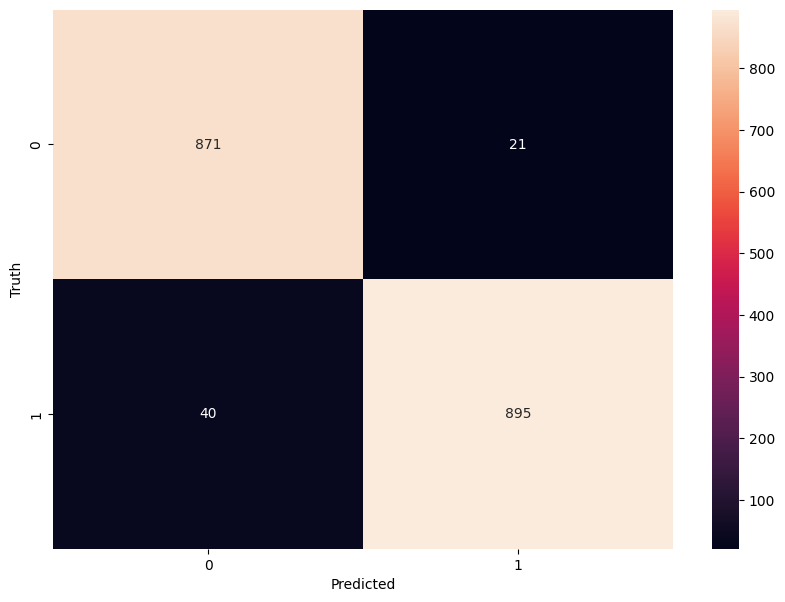

In [ ]:
import seaborn as sn
accuracy_score(y_test, y_pred_rf)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_rf))
print('Training Classification report for Random Forest Classifier:\n',classification_report(y_train, rf.predict(X_train_dtm)))
print('Testing Classification Report for Random Forest Classifier:\n',classification_report(y_test, y_pred_rf))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

cm = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>Decision Tree Classifier</h2>

In [ ]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
#train the model
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 1.86 s, sys: 1.13 ms, total: 1.86 s
Wall time: 1.9 s


DecisionTreeClassifier()

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [ ]:
dt.score(X_test_dtm,y_test)

0.9354132457580734

In [ ]:
# Model Accuracy
print('Training Classification report for Decision Tree Classifier:\n',classification_report(y_train, dt.predict(X_train_dtm)))
print('Testing Classification Report for Decision Tree Classifier:\n',classification_report(y_test, y_pred_class))

print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Training Classification report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       1.00      1.00      1.00      2109

    accuracy                           1.00      4261
   macro avg       1.00      1.00      1.00      4261
weighted avg       1.00      1.00      1.00      4261

Testing Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       892
           1       0.91      0.97      0.94       935

    accuracy                           0.94      1827
   macro avg       0.94      0.93      0.94      1827
weighted avg       0.94      0.94      0.94      1827

Confusion Matrix

[[804  88]
 [ 30 905]]


Text(95.72222222222221, 0.5, 'Truth')

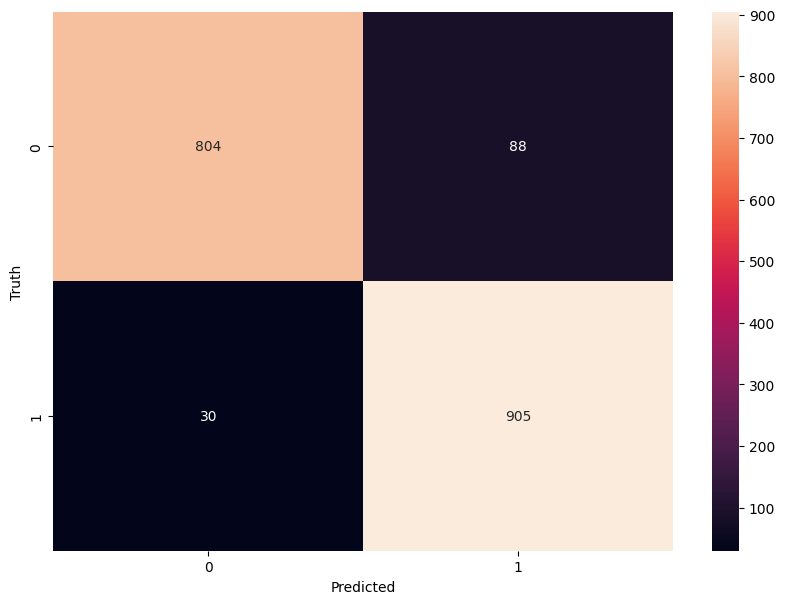

In [ ]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [ ]:
#Lets Predict for a data set
X_test

1749    onsite host (alexandria, va) us, va, alexandri...
271     web developer us, ny, new york augmented reali...
180     inbound marketer / community manager gb, , lon...
2381    player us, ia, coralville join teamif interest...
1969    leasing consultant us, fl, orlando heafey grou...
                              ...                        
4717    executive chef my, , responsible food producti...
1255    linux system administrator ca, on, toronto uno...
5317    trainer/recuiter specialist us, ms, oxford hea...
1956    front end engineer hu, bu, budapest based san ...
921     hotel guest service agent us, wv, falling wate...
Name: text, Length: 1827, dtype: object

In [ ]:
print(X_test.iloc[972])

graphic designer us, ga, atlanta #url_25e85371e7108e279a4b25d6e965889a44917879b7b587c905714ef30f933cb8# young, growing e-commerce company eyes future. ever since launch 2005, we've growing year year. homegrown athens, ga, uberprints runs customer service production operations behind downtown. we're looking expand reach opening atlanta office house business development, it, creative teams. #url_25e85371e7108e279a4b25d6e965889a44917879b7b587c905714ef30f933cb8# seeking talented graphic designer looking opportunity show skills joining atlanta branch. ideal candidate experience web ui design able argue difference helvetica neue helvetica. part small, talented team fun, creative people enjoy pushing limits technology design. want:an extremely talented graphic designer (did repeat that?)someone passion designsomeone constantly pushes themselves, meet deadlines, always growing developing designer get:an opportunity join young, growing company solid track record growthmoneyhealth insurance matc

In [ ]:
input_text=["I have a personal assistant position for you. As a consultant with a focus in international business, the majority of my clients are out of state and out of the country, You will be working from home, school or anywhere. The hours are flexible so you can spread those 4-8 hours a week on your own time. I will provide you with sufficient funds and adequate instruction for every task. I will be sending money for my errands inclusive of payment for your service through my bank channel.  "]

In [ ]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[1]
Fraudulant Job


In [ ]:
#Lets check wether predicted result was correct or not
print(y_test.iloc[972])

0


In [ ]:
vect

CountVectorizer()

In [ ]:
lr,rf,knn,dt,nb

(LogisticRegression(),
 RandomForestClassifier(),
 KNeighborsClassifier(n_neighbors=50),
 DecisionTreeClassifier(),
 MultinomialNB())

In [ ]:
stop_words = {i:j for i,j in enumerate(stop_words)}
stop_words

{0: 'but',
 1: "it's",
 2: 're',
 3: 'couldn',
 4: 'below',
 5: 'he',
 6: 'as',
 7: 'yourselves',
 8: 'was',
 9: 'an',
 10: 'how',
 11: 'in',
 12: 'will',
 13: 'so',
 14: 'should',
 15: 'hadn',
 16: "hadn't",
 17: 'most',
 18: 'ours',
 19: "you'll",
 20: 'they',
 21: 'at',
 22: 'under',
 23: 'own',
 24: 'him',
 25: 'm',
 26: 'from',
 27: 'has',
 28: 'some',
 29: 'which',
 30: 'needn',
 31: 'these',
 32: "should've",
 33: 'did',
 34: 'ain',
 35: "isn't",
 36: 'aren',
 37: 'hers',
 38: 'me',
 39: 'above',
 40: 'had',
 41: 'and',
 42: "won't",
 43: "that'll",
 44: 'again',
 45: "didn't",
 46: "wouldn't",
 47: 'doing',
 48: 'very',
 49: "you're",
 50: 'or',
 51: 'does',
 52: 'she',
 53: 'while',
 54: 'nor',
 55: 't',
 56: 'myself',
 57: 'mightn',
 58: 'into',
 59: 'themselves',
 60: 'herself',
 61: "mustn't",
 62: 'for',
 63: 's',
 64: 'theirs',
 65: 'what',
 66: "you'd",
 67: 'itself',
 68: 'whom',
 69: 'after',
 70: 'once',
 71: 'doesn',
 72: 'all',
 73: "shouldn't",
 74: 'not',
 75: "ne

In [ ]:
nb

MultinomialNB()

In [ ]:
import joblib
joblib.dump(vect, 'vect.sav')
joblib.dump(dt, 'dt.sav')
joblib.dump(rf, 'rf.sav')
joblib.dump(knn, 'knn.sav')
joblib.dump(lr, 'lr.sav')
joblib.dump(nb, 'nb.sav')

['nb.sav']

In [ ]:
import json
with open('stopwords.json','w') as fp:
    json.dump(stop_words,fp)

In [ ]:
!mkdir files/
!mv *.sav files/
!mv stopwords.json files/

mkdir: cannot create directory ‘files/’: File exists


In [ ]:
!zip -r files.zip files

updating: files/ (stored 0%)
updating: files/rf.sav (deflated 81%)
updating: files/vect.sav (deflated 43%)
updating: files/knn.sav (deflated 83%)
updating: files/dt.sav (deflated 78%)
updating: files/lr.sav (deflated 32%)
updating: files/stopwords.json (deflated 65%)
  adding: files/nb.sav (deflated 90%)


In [ ]:
!pip list | grep scikit

scikit-image                     0.19.3
scikit-learn                     1.2.2


Thus the predicted result was correct.